Analysis: 
Temperature in the Southern hemisphere at the end of Mayy  are observed to be warmer in general than in the Northern hemisphere (where in the Northern hemisphere it is the middle of spring, and in the southern hemisphere it is the middle of fall). There is less variability in temeratures across the Southern hemisphere than in the Northern hemisphere. In general, across both hemispheres, the closer cities get to the equitor the greater their max temp was observed to be.
While there seems to be more variability in humidity the closer one gets to the equator in the Northern hemisphere than the Southern hemisphere, and more variability in humidity farther from the equator for the Southern hemisphere than the Northern hemisphere, it is difficult to conclude that the proximity to the equator is driving a trend.
Cloudiness does not appear to be affected by distance to or from the equator. 
Observed wind speed is more spread in the Northern Hemisphere the farther one is from the equator when compared to the variance observed between cities farther from the equator in the Southern hemisphere, but again it is difficult to attribute this to equator distance.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
temp = []
humidity = []
cloudiness = []
wind_speed = []
city_list = []
country = []
date = []
lat = []
lng = []

units = "imperial"
#check it works for one
city_trial = "London"
# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="
#this helps you locate what you want to append into the other lists
data = requests.get(query_url + city_trial).json()
pprint(data)

count = 0
for city in cities:
    count+=1
    print(f"Processing record {count} for {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_list.append(response['name'])
        
    except (KeyError,IndexError):
        print(f"no information gathered for {city}. Skipping")
    


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1553642376,
 'id': 2643743,
 'main': {'humidity': 66,
          'pressure': 1033,
          'temp': 43.77,
          'temp_max': 48.2,
          'temp_min': 39},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'message': 0.007,
         'sunrise': 1553579420,
         'sunset': 1553624527,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 1.12}}
Processing record 1 for novo aripuana
Processing record 2 for hobart
Processing record 3 for portland
Processing record 4 for dunedin
Processing record 5 for atuona
Processing record 6 for balykshi
no information gathered for balykshi. Skipping
Processing record 7 for kodiak
Processing record 8 for vardo
Processing record 9 for busselton
Processing record 10 for punta are

Processing record 194 for ucluelet
Processing record 195 for mandalgovi
Processing record 196 for pangnirtung
Processing record 197 for arcata
Processing record 198 for nouadhibou
Processing record 199 for san patricio
Processing record 200 for pacific grove
Processing record 201 for wewak
Processing record 202 for grand gaube
Processing record 203 for berdigestyakh
Processing record 204 for aksarka
Processing record 205 for touros
Processing record 206 for rahuri
Processing record 207 for ahuimanu
Processing record 208 for tasiilaq
Processing record 209 for coquimbo
Processing record 210 for suraabad
Processing record 211 for lagoa
Processing record 212 for barentsburg
no information gathered for barentsburg. Skipping
Processing record 213 for necochea
Processing record 214 for najran
Processing record 215 for abrau-dyurso
Processing record 216 for mocajuba
Processing record 217 for lamar
Processing record 218 for beloha
Processing record 219 for vila velha
Processing record 220 for l

Processing record 394 for codajas
Processing record 395 for rio grande
Processing record 396 for hofn
Processing record 397 for phan thiet
Processing record 398 for pavlodar
Processing record 399 for dobrusevo
Processing record 400 for lorengau
Processing record 401 for alice springs
Processing record 402 for swan hill
Processing record 403 for praia da vitoria
Processing record 404 for biak
Processing record 405 for birao
Processing record 406 for ust-maya
Processing record 407 for la ronge
Processing record 408 for sur
Processing record 409 for margate
Processing record 410 for fengcheng
Processing record 411 for northam
Processing record 412 for toliary
no information gathered for toliary. Skipping
Processing record 413 for mecca
Processing record 414 for baie-comeau
Processing record 415 for aripuana
Processing record 416 for the pas
Processing record 417 for tateyama
Processing record 418 for verkhnevilyuysk
Processing record 419 for spring hill
Processing record 420 for talnakh
P

Processing record 583 for tiarei
Processing record 584 for myrtle beach
Processing record 585 for solnechnyy
Processing record 586 for san lorenzo
Processing record 587 for roura
Processing record 588 for filingue
Processing record 589 for aqtobe
Processing record 590 for banda aceh
Processing record 591 for kissidougou
Processing record 592 for kahuta
Processing record 593 for vao
Processing record 594 for dingalan
Processing record 595 for mrirt
no information gathered for mrirt. Skipping
Processing record 596 for cockburn harbour
no information gathered for cockburn harbour. Skipping
Processing record 597 for kudahuvadhoo
Processing record 598 for brae
Processing record 599 for ambodifototra
no information gathered for ambodifototra. Skipping
Processing record 600 for pavino
Processing record 601 for shirpur
Processing record 602 for hasaki
Processing record 603 for waipawa
Processing record 604 for sibolga
Processing record 605 for maceio
Processing record 606 for le port
Processin

In [6]:
#create the dictionary
weather_dict = {
    "City": city_list,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Max Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
}
#convert timestamp to actual date
# weather_data["Date"]=weather_data["Date"].astype(int)
# weather_dict['Date'] = pd.to_datetime(weather_dict['Date'], unit='s')
# weather_dict["Date"]=datetime.utcfromtimestamp(weather_dict["Date"]).strftime('%Y-%m-%d %H:%M:%S')

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Lat,Lng,Wind Speed
0,Novo Aripuana,8,BR,1553642586,70,82.75,-5.12,-60.38,4.09
1,Hobart,0,AU,1553642295,50,62.01,-42.88,147.33,10.29
2,Portland,75,US,1553642421,38,62.01,45.52,-122.67,10.29
3,Dunedin,92,NZ,1553642242,81,59.00,-45.87,170.50,14.00
4,Atuona,8,PF,1553642375,100,82.44,-9.80,-139.03,13.15


In [53]:
#write to csv file
weather_data.to_csv(output_data_file)

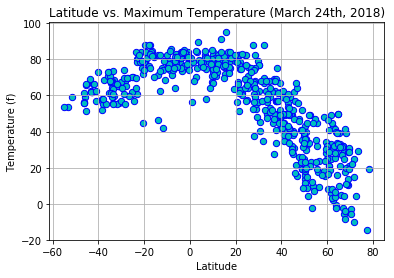

In [7]:
#create a scatterplot of latitude vs. temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color="c",
           edgecolors = "blue", s = 40)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
plt.title("Latitude vs. Maximum Temperature (March 24th, 2018)")
plt.savefig("images/latitude_max-temp")

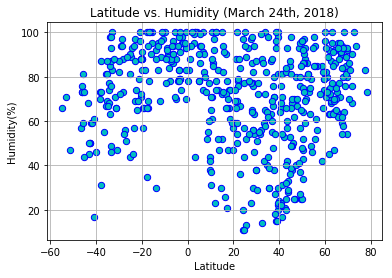

In [8]:
#create a scatterplot of latitude vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color="c",
           edgecolors = "blue", s = 40)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Latitude vs. Humidity (March 24th, 2018)")
plt.savefig("images/latitude_humidity")

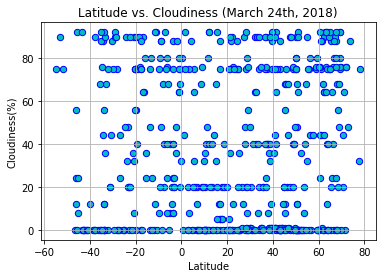

In [9]:
#create a scatterplot of latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color="c",
           edgecolors = "blue", s = 40)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs. Cloudiness (March 24th, 2018)")
plt.savefig("images/latitude_cloudiness")

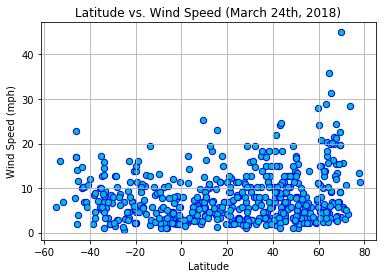

In [10]:
#create a scatterplot of latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color="c",
           edgecolors = "blue", s = 40)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (March 24th, 2018)")
plt.savefig("images/latitude_wind-speed")

Analysis: 